### Netflix Movies and TV shows

Here, I have data of 'Netflix Movies and TV shows' from Kaggle.
I'm just going to analyse and play with the data by using Python.

In [9]:
%matplotlib inline
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt



In [10]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


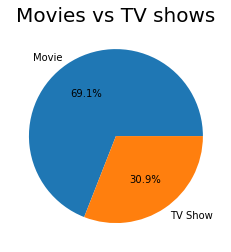

In [105]:
#Firstly, I want to know the number of movies and TV shows and compare.
#To read it easy, I'm going to use 'pie' graph.

plt.pie(vs_count, labels=vs_count.index, autopct='%.1f%%')
plt.title('Movies vs TV shows', fontsize=20)
plt.show()

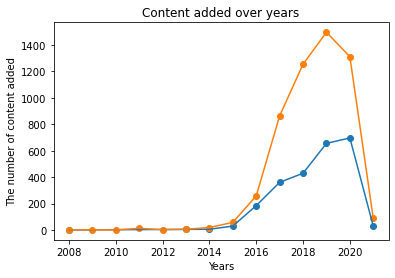

In [80]:
# I also want to see how the graph of both movies and TV shows change every year.
# We can tell if Netfilx is focusing more on movies or TV shows.

# Create 'year_added' columes.
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

d1 = df[df["type"] == "TV Show"].year_added.value_counts()
d1.sort_index(inplace=True)

d2 = df[df["type"] == "Movie"].year_added.value_counts()
d2.sort_index(inplace=True)

plt.scatter(d1.index, d1.values)
plt.plot(d1.index, d1.values)
plt.scatter(d2.index, d2.values)
plt.plot(d2.index, d2.values)
plt.title("Content added over years")
plt.xlabel("Years")
plt.ylabel("The number of content added")

plt.show()


I want to find out TOP 10 countries that has the most number of movies and TV showes. I'm also going to use a pie chart.

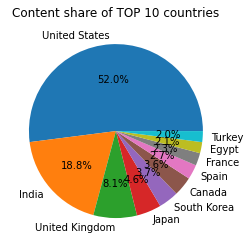

In [107]:
country_count = df['country'].value_counts()[:10]
plt.pie(country_count, labels=country_count.index, autopct='%.1f%%')
plt.title('Content share of TOP 10 countries')
plt.show()

I want to find TOP 10 directors in this dataset.
   

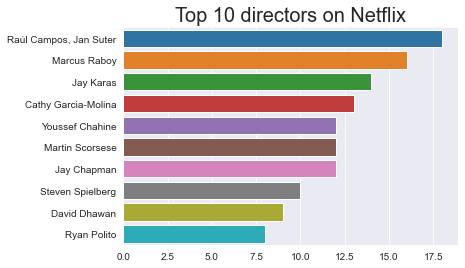

In [118]:
directors = df['director'].value_counts()
plt.title('Top 10 directors on Netflix', fontsize=20)
plt.tick_params()
sns.barplot(y=directors.index[:10], x=directors.values[:10])

plt.show()

This time, I want to see how graph of the duration of the movies and TV shows.

<ipython-input-119-6c45ace997eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_count['duration']=movies_count['duration'].str.replace(' min','')
<ipython-input-119-6c45ace997eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_count['duration']=movies_count['duration'].astype(str).astype(int)


<AxesSubplot:>

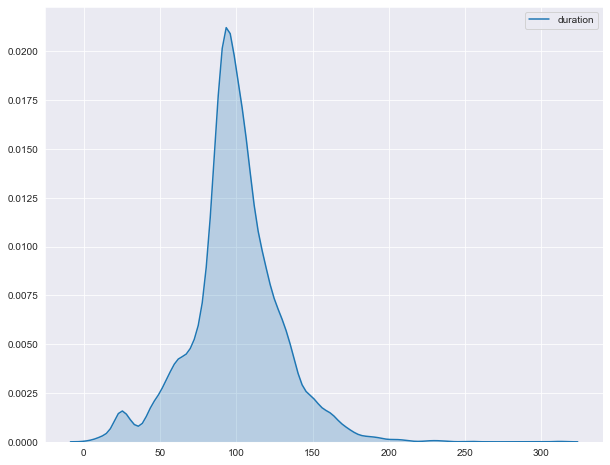

In [119]:
movies_count = df[df.type == "Movie"]

movies_count['duration']=movies_count['duration'].str.replace(' min','')
movies_count['duration']=movies_count['duration'].astype(str).astype(int)
movies_count['duration']

# movie duration distribution
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.kdeplot(data=movies_count["duration"], shade=True)